<a href="https://colab.research.google.com/github/nhlong1512/IS252.N21/blob/main/RandomForestClassifier/random_forest_classifier_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries 


In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [66]:
import warnings

warnings.filterwarnings('ignore')

Import dataset


In [67]:
data = 'car_evaluation.csv'

df = pd.read_csv(data)
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


Phân tích dữ liệu

In [68]:
df.shape

(1727, 7)

Chúng ta có thể thấy rằng có 1728 trường hợp và 7 biến trong tập dữ liệu.

In [69]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Đổi tên cột

In [70]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [71]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Xem tóm tắt tập dữ liệu

In [72]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Phân phối tần số của các giá trị trong các biến


In [73]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


Có 7 biến trong tập dữ liệu. Tất cả các biến thuộc loại dữ liệu phân loại.

Chúng được đưa ra bằng cách mua, bảo trì, cửa ra vào, người, lug_boot, an toàn và đẳng cấp.
<br>
Lớp là biến mục tiêu.

Khám phá biến class

In [74]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [75]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Chúng ta có thể thấy rằng không có giá trị nào bị thiếu trong tập dữ liệu. Tôi đã kiểm tra phân phối tần suất của các giá trị trước đó. Nó cũng xác nhận rằng không có giá trị nào bị thiếu trong tập dữ liệu.

Khai báo vector đặc trưng và biến mục tiêu

In [96]:
X = df.drop(['class'], axis=1)

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object


Tách dữ liệu thành tập huấn luyện và kiểm tra riêng biệt

In [77]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [78]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

**Feature Engineering**

In [79]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

Mã hóa các biến phân loại

Bây giờ, tôi sẽ mã hóa các biến phân loại.

In [80]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [81]:
# import category encoders
!pip install --upgrade category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [83]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [84]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


Bây giờ chúng tôi đã có bộ đào tạo và thử nghiệm sẵn sàng để xây dựng mô hình.

**Mô hình phân loại rừng ngẫu nhiên với các tham số mặc định**

In [85]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9649


Ở đây, y_test là nhãn lớp thực và y_pred là nhãn lớp dự đoán trong tập kiểm tra.

mã liên kết

Ở đây, tôi đã xây dựng mô hình Random Forest Classifier với tham số mặc định là n_estimators = 10. Vì vậy, tôi đã sử dụng 10 cây quyết định để xây dựng mô hình. Bây giờ, tôi sẽ tăng số lượng cây quyết định và xem ảnh hưởng của nó đối với độ chính xác.

**Random Forest Classifier model with parameter n_estimators=100**

In [86]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9649


Điểm chính xác của mô hình với 10 cây quyết định là 0,9247 nhưng tương tự với 100 cây quyết định là 0,9457. Vì vậy, độ chính xác dự kiến ​​sẽ tăng theo số lượng cây quyết định trong mô hình.

**Các tính năng quan trọng với mô hình Random Forest**

Cho đến bây giờ, tôi đã sử dụng tất cả các tính năng được đưa ra trong mô hình. Bây giờ, tôi sẽ chỉ chọn các tính năng quan trọng, xây dựng mô hình bằng cách sử dụng các tính năng này và xem ảnh hưởng của nó đối với độ chính xác.

Đầu tiên mình sẽ tạo mô hình Random Forest như sau:-

In [87]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [88]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.291657
persons     0.235380
buying      0.160692
maint       0.134143
lug_boot    0.111595
doors       0.066533
dtype: float64

Chúng ta có thể thấy rằng tính năng quan trọng nhất là safety và tính năng ít quan trọng nhất là doors.

**Trực quan hóa điểm số của các tính năng**

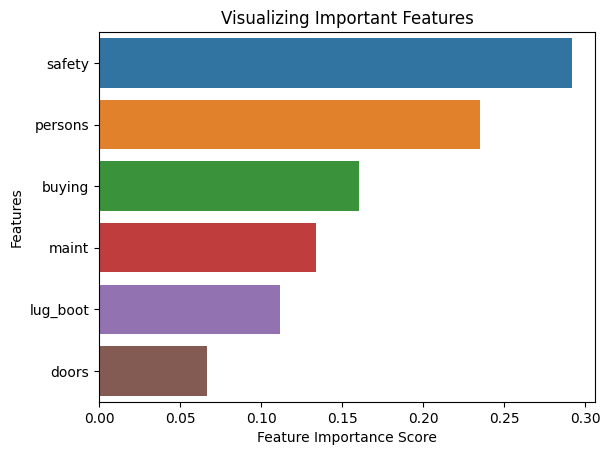

In [89]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

**Xây dựng mô hình Rừng ngẫu nhiên trên các tính năng đã chọn**

Bây giờ, tôi sẽ loại bỏ các cửa tính năng ít quan trọng nhất khỏi mô hình, xây dựng lại mô hình và kiểm tra ảnh hưởng của nó đối với độ chính xác.

In [90]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [91]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Now, I will build the random forest model and check accuracy.

In [92]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [93]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9263


Tôi đã loại bỏ biến "doors" khỏi mô hình, xây dựng lại và kiểm tra độ chính xác của nó. Độ chính xác của mô hình sau khi loại bỏ biến "doors" là 0.9264. Độ chính xác của mô hình khi tính đến tất cả các biến là 0.9247. Vì vậy, chúng ta có thể thấy rằng độ chính xác của mô hình đã được cải thiện khi loại bỏ biến "doors" khỏi mô hình.

Hơn nữa, biến "lug_boot" là biến quan trọng thứ hai nhất. Nếu tôi loại bỏ nó khỏi mô hình và xây dựng lại mô hình, thì độ chính xác sẽ giảm xuống còn 0.8546. Đây là một sự giảm đáng kể về độ chính xác. Vì vậy, tôi sẽ không loại bỏ biến "lug_boot" khỏi mô hình.

Dựa trên phân tích trên, chúng ta có thể kết luận rằng độ chính xác của mô hình phân loại của chúng ta rất tốt. Mô hình của chúng ta đang làm rất tốt trong việc dự đoán nhãn lớp.

Tuy nhiên, mô hình không cung cấp phân phối giá trị bên trong. Ngoài ra, nó không cho biết về loại lỗi mà bộ phân loại của chúng ta đang gặp phải.

Chúng ta có một công cụ khác gọi là **Confusion matrix** giúp chúng ta giải quyết vấn đề này.

**Confusion matrix**


Ma trận nhầm lẫn (confusion matrix) là một công cụ để tổng hợp hiệu suất của một thuật toán phân loại. Ma trận nhầm lẫn cung cấp cho chúng ta một cái nhìn rõ ràng về hiệu suất của mô hình phân loại và các loại lỗi mà mô hình tạo ra. Nó cung cấp cho chúng ta một tóm tắt về các dự đoán đúng và sai lệch phân loại theo từng nhãn.

Có bốn loại kết quả có thể xảy ra trong quá trình đánh giá hiệu suất của một mô hình phân loại. Bốn loại kết quả này được mô tả như sau:

True Positives (TP) - True Positives xảy ra khi chúng ta dự đoán một quan sát thuộc về một lớp nhất định và quan sát thực tế thuộc về lớp đó.

True Negatives (TN) - True Negatives xảy ra khi chúng ta dự đoán một quan sát không thuộc về một lớp nhất định và quan sát thực tế cũng không thuộc về lớp đó.

False Positives (FP) - False Positives xảy ra khi chúng ta dự đoán một quan sát thuộc về một lớp nhất định nhưng quan sát thực tế không thuộc về lớp đó. Loại lỗi này được gọi là lỗi Loại I.

False Negatives (FN) - False Negatives xảy ra khi chúng ta dự đoán một quan sát không thuộc về một lớp nhất định nhưng quan sát thực tế thuộc về lớp đó. Đây là một loại lỗi rất nghiêm trọng và được gọi là lỗi Loại II.

Bốn kết quả này được tổng hợp trong một ma trận nhầm lẫn như dưới đây.

In [94]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[108   5  12   2]
 [  1  10   2   5]
 [ 10   0 389   0]
 [  4   1   0  21]]


**Classification Report**

Báo cáo phân loại là một cách khác để đánh giá hiệu suất của mô hình phân loại. Nó hiển thị điểm chính xác, thu hồi, f1 và hỗ trợ cho mô hình. Tôi đã mô tả các thuật ngữ này sau.

Chúng tôi có thể in một báo cáo phân loại như sau: -

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       127
        good       0.62      0.56      0.59        18
       unacc       0.97      0.97      0.97       399
       vgood       0.75      0.81      0.78        26

    accuracy                           0.93       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.93      0.93      0.93       570



**Kết quả và kết luận**

Trong dự án này, bạn đã sử dụng thuật toán Rừng ngẫu nhiên để xây dựng bộ phân loại dự đoán mức độ an toàn của ô tô. Bạn đã xây dựng hai mô hình, một với 10 cây quyết định và một với 100 cây quyết định.

Độ chính xác của mô hình với 10 cây quyết định là 0,9247, trong khi độ chính xác của mô hình với 100 cây quyết định là 0,9457. Do đó, dự kiến độ chính xác sẽ tăng theo số lượng cây quyết định trong mô hình.

Bạn đã sử dụng mô hình Rừng ngẫu nhiên để xác định các tính năng quan trọng, xây dựng mô hình bằng cách sử dụng những tính năng này và xem xét ảnh hưởng của chúng đối với độ chính xác. Tính năng quan trọng nhất là tính năng an toàn và tính năng ít quan trọng nhất là lug_boot (kích thước hành lý).

Bạn đã loại bỏ biến cửa ra khỏi mô hình, xây dựng lại và kiểm tra độ chính xác của nó. Độ chính xác của mô hình khi loại bỏ biến cửa là 0,9264. Độ chính xác của mô hình với tất cả các biến được tính đến là 0,9247. Do đó, ta thấy rằng độ chính xác của mô hình đã được cải thiện khi loại bỏ biến cửa ra khỏi mô hình.

Tuy nhiên, nếu bạn loại bỏ tính năng lug_boot khỏi mô hình và xây dựng lại, độ chính xác giảm đáng kể xuống còn 0,8546. Vì vậy, bạn quyết định giữ tính năng này trong mô hình.

Để có cái nhìn rõ hơn về hiệu suất của mô hình phân loại, bạn sử dụng ma trận nhầm lẫn và báo cáo phân loại. Chúng giúp trực quan hóa hiệu suất của mô hình và phân tích các loại lỗi mà mô hình tạo ra.